In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from constants import TRAJECTORYTOOLS_DATASETS_INFO
from figures import TR_INDIVS_BOXPLOT_MEAN_STAT_MEAN
from utils import data_filter
from plotters import boxplot_variables


In [2]:
def plot(config_dict):
    data_info = TRAJECTORYTOOLS_DATASETS_INFO[config_dict['data_variables_group']]
    data = pd.read_pickle(data_info['file_path'])
    data_filtered = data_filter(data, config_dict['data_filters'])
    data_filtered_stat = data_filtered.groupby(
        config_dict['groupby_cols']
    ).agg(config_dict['agg_rule']).reset_index()
    assert config_dict['partition_column'] in data_filtered_stat
    partitions = data_filtered_stat[config_dict['partition_column']].unique()
    variables = config_dict['variables']
    fig, axs = plt.subplots(len(partitions), len(variables), figsize=(30, 5 * len(partitions)))
    plt.subplots_adjust(wspace=0.4, hspace=.5)
    for axs_row, partition in zip(axs, partitions):
        partition_data = data_filtered_stat[data_filtered_stat[config_dict['partition_column']] == partition]
        boxplot_variables(
            axs_row, 
            partition_data, 
            variables, 
            partition, 
            config_dict['boxplot_kwargs'], 
            config_dict['pairs_of_groups_for_stats'], 
            config_dict['stats_kwargs']
        )
    for extension in config_dict['extensions']:
        fig.savefig(config_dict['save_path'] + f".{extension}")
    

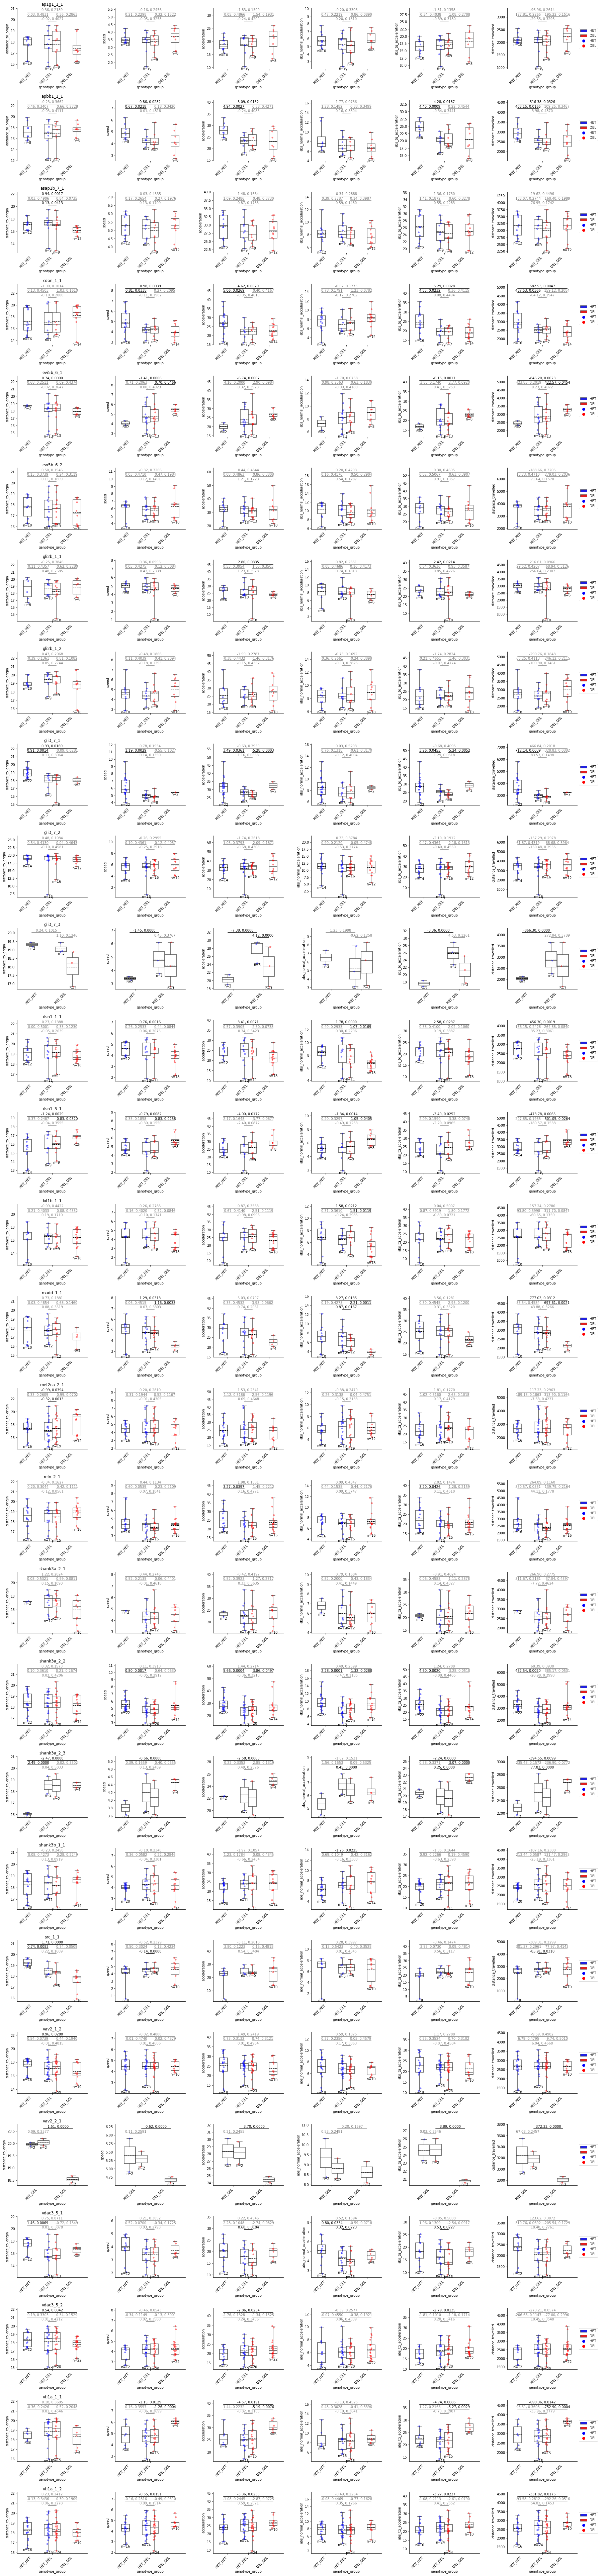

In [3]:
plot(TR_INDIVS_BOXPLOT_MEAN_STAT_MEAN)